In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv(r"/content/heart (1).csv")


In [6]:
data.head()
#Top 5 Rows of dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.tail()

#Last 5 Rows of dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
data.shape
#Number of Rows and Columns

(303, 14)

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

#This is also method to calculate the number of rows,columns

Number of Rows 303
Number of Columns 14


In [10]:
data.info()

#Information gives about total number of rows and columns;
# Datatypes of each column and Memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
data.isnull().sum()
#To check null values data

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
data_dup = data.duplicated().any()
print(data_dup)
#Tocheck duplicate data present or not

True


In [13]:
data = data.drop_duplicates()

#To drop or remove duplicate data

In [14]:
data.shape

(302, 14)

In [15]:
data.describe()
# To check statistics(count,mean,std,min,max)  for numerical column

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
data.corr()
#To check correlation

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

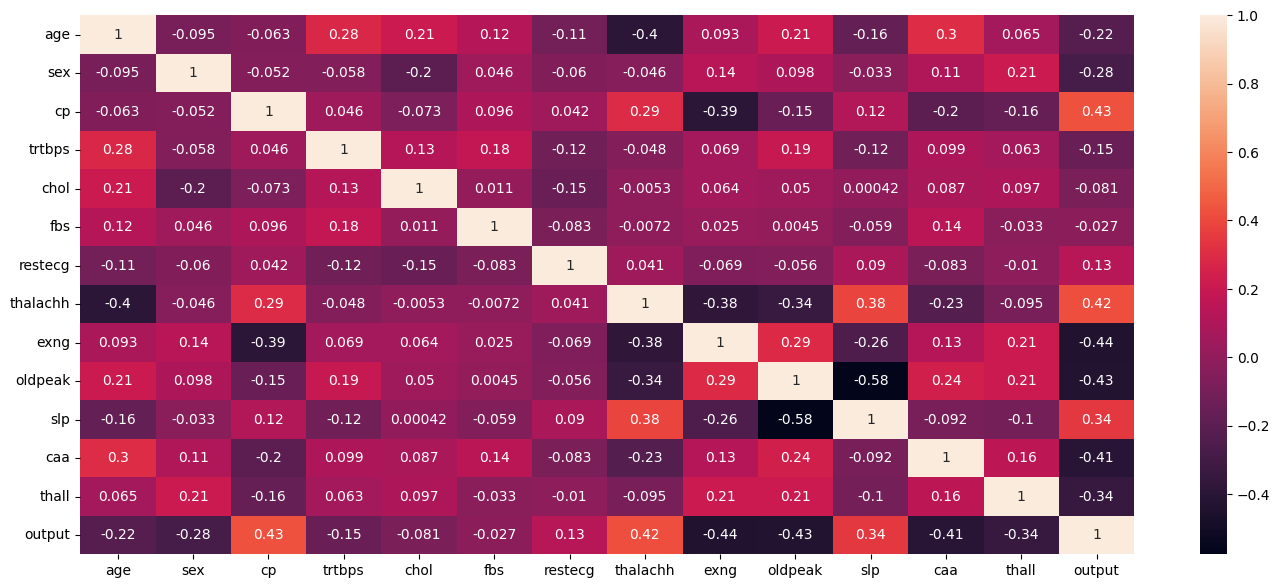

In [17]:
plt.figure(figsize=(17,7))
sns.heatmap(data.corr(),annot=True)
# This is visualization to check correlation by seaborn and matplotlib
#annot is true means to show data value

In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [19]:
data['sex'].value_counts()
#to check how many have heart disease or not

1    206
0     96
Name: sex, dtype: int64

<Axes: ylabel='count'>

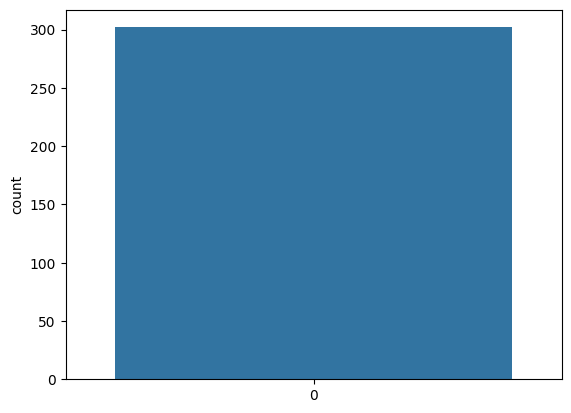

In [20]:
sns.countplot(data['sex'])

# data visualization of heart disease by seaborn

In [21]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

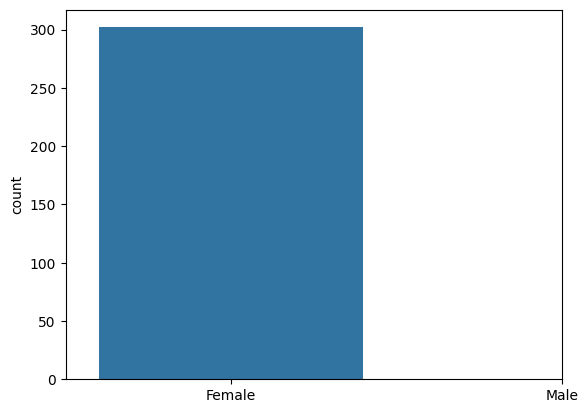

In [22]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female','Male'])

plt.show()

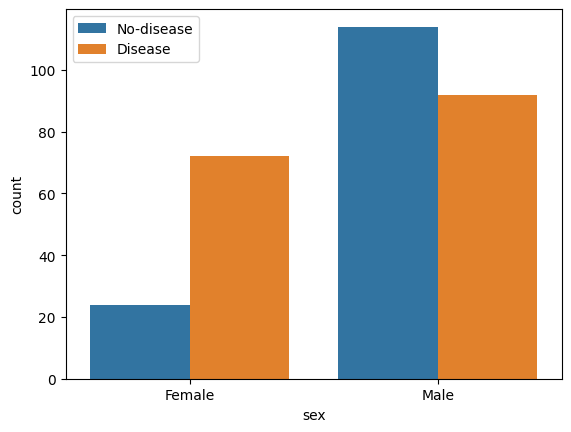

In [23]:
sns.countplot(x='sex',hue="output",data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

#Gender distribution by target variable

In [ ]:
sns.distplot(data['age'],bins=20)
plt.show()

#Age distribution by seaborn

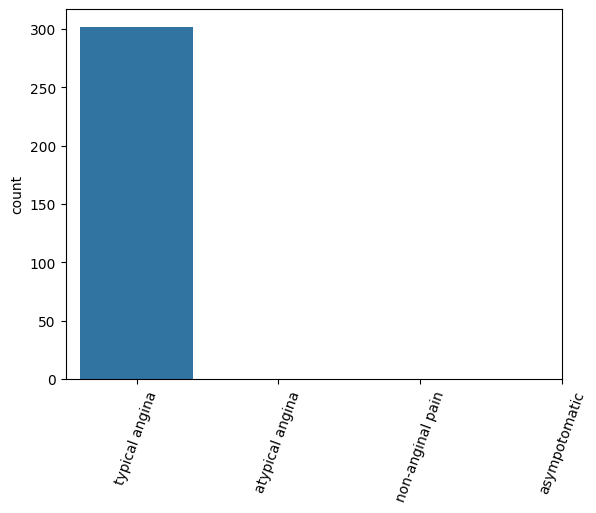

In [25]:
sns.countplot(data['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asympotomatic'])
plt.xticks(rotation=70)
plt.show()

#to check chest pain type; typical angina is more common among people

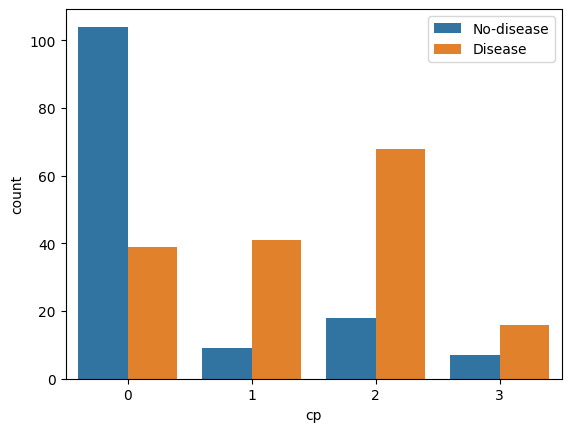

In [26]:
sns.countplot(x='cp',hue='output',data=data)
plt.legend(labels=['No-disease','Disease'])
plt.show()

#to check chest pain by target variable

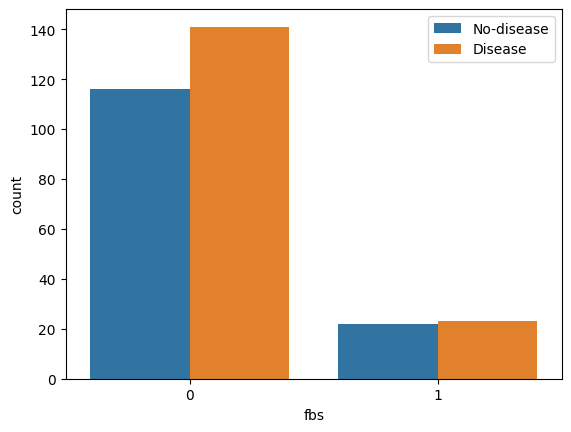

In [27]:
sns.countplot(x='fbs',hue='output',data=data)
plt.legend(labels=['No-disease','Disease'])
plt.show()
# to check fasting blood sugar by target variable

<Axes: >

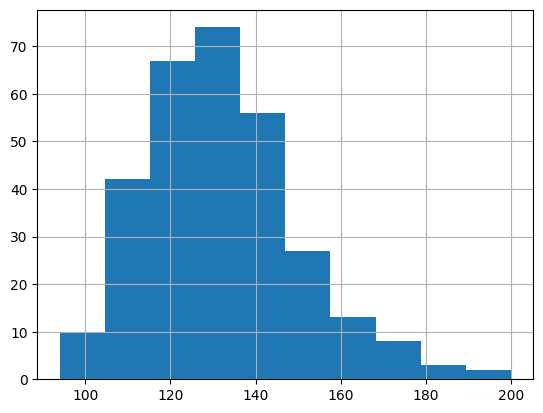

In [28]:
data['trtbps'].hist()
#to check resting blood pressure distribution

d:\PYTHON\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
d:\PYTHON\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


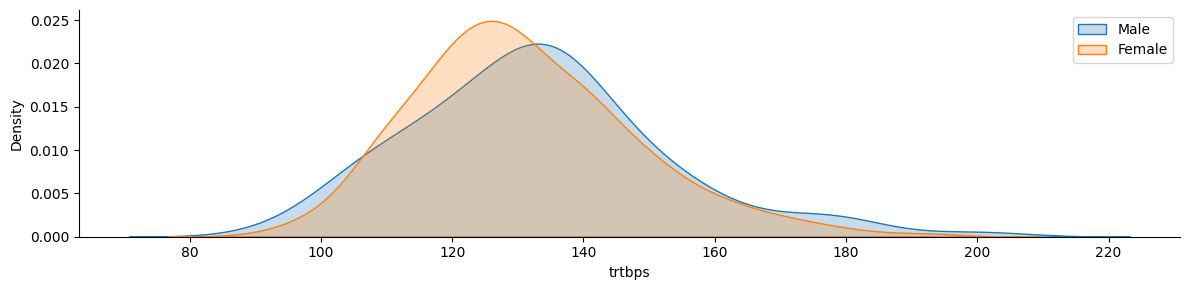

In [29]:
g =sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trtbps',shade=True)
plt.legend(labels=['Male','Female'])

<Axes: >

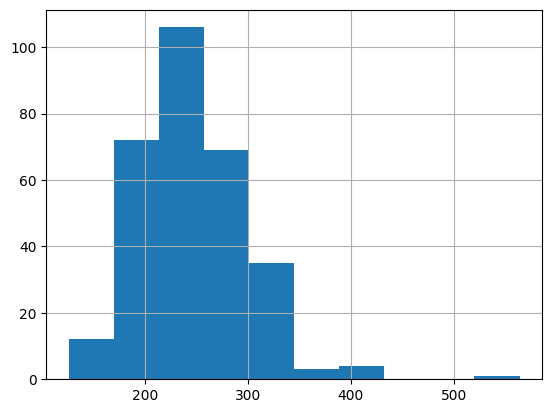

In [30]:
data['chol'].hist()

In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [32]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        
# to check contiuous and category value

In [33]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [34]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

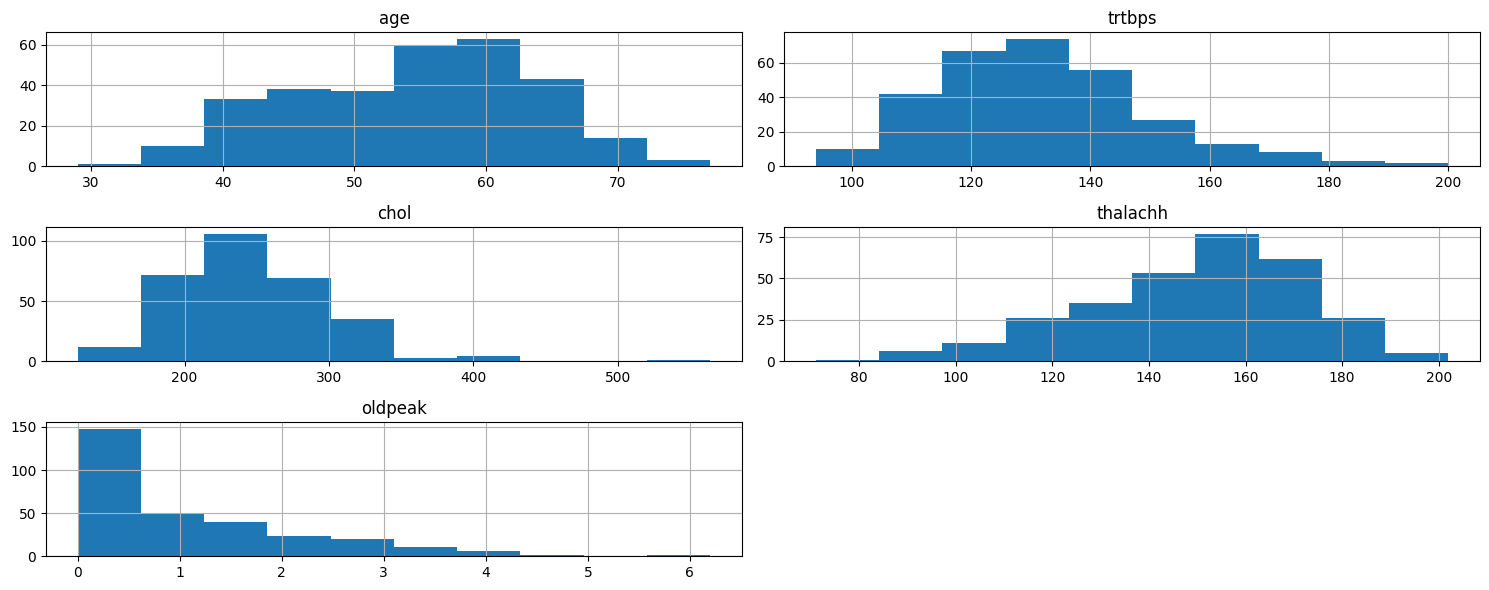

In [35]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout() # to avoid overlapping
plt.show()

Precision:  0.8787878787878788
Recall:  0.90625
F1 Score:  0.8923076923076922
Accuracy:  0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



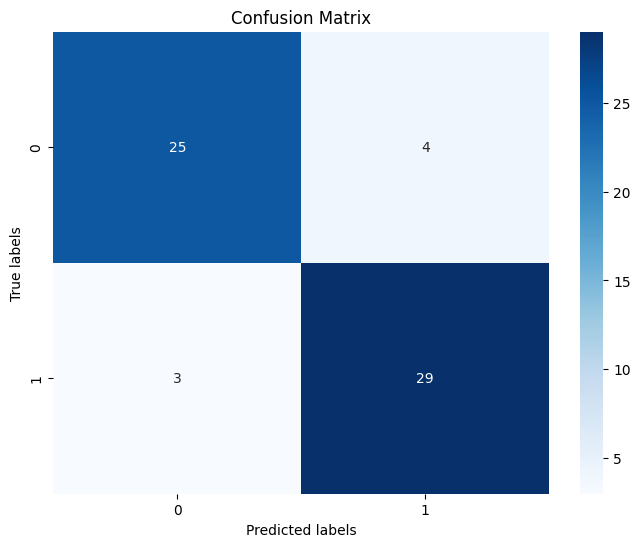

Mean Squared Error (MSE):  0.11475409836065574
Root Mean Squared Error (RMSE):  0.3387537429470791


In [ ]:
# LogisticRegression

data = pd.read_csv(r"/content/heart (1).csv")

X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)  # Print accuracy along with other metrics

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)


Precision:  0.84
Recall:  0.65625
F1 Score:  0.736842105263158
Accuracy:  0.7540983606557377
MSE:  0.2459016393442623
RMSE:  0.4958847036804647
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



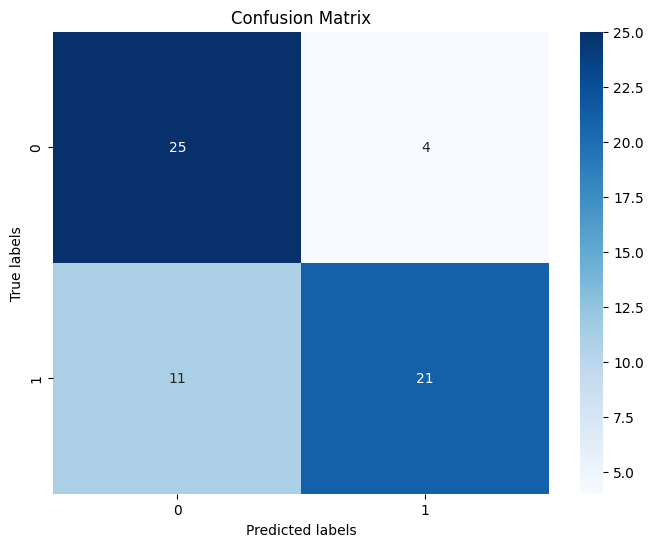

In [ ]:
#DecisionTreeClassifier

data = pd.read_csv(r"/content/heart (1).csv")

X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("MSE: ", mse)  # Print MSE
print("RMSE: ", rmse)  # Print RMSE

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Precision:  0.5517241379310345
Recall:  0.5
F1 Score:  0.5245901639344263
Accuracy:  0.5245901639344263
MSE:  0.47540983606557374
RMSE:  0.6894996998299374
              precision    recall  f1-score   support

           0       0.50      0.55      0.52        29
           1       0.55      0.50      0.52        32

    accuracy                           0.52        61
   macro avg       0.53      0.53      0.52        61
weighted avg       0.53      0.52      0.52        61



d:\PYTHON\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


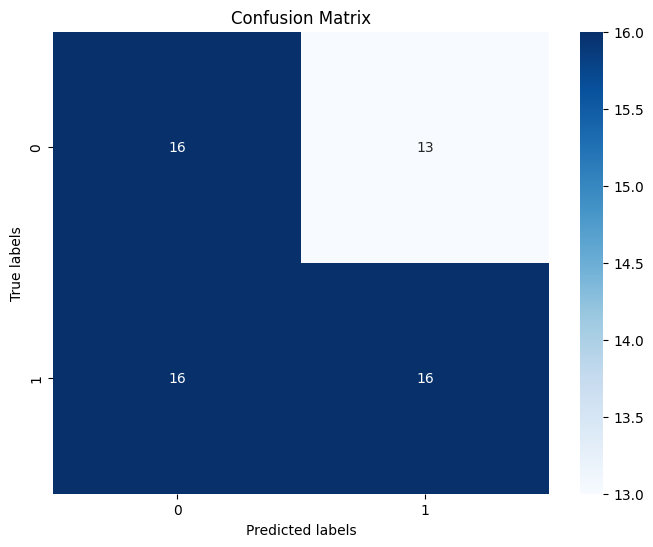

In [ ]:
#svm

data = pd.read_csv(r"/content/heart (1).csv")

data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42, max_iter=1000)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = np.sqrt(mse)  # Calculate RMSE

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)
print("MSE: ", mse)  # Print MSE
print("RMSE: ", rmse)  # Print RMSE

print(classification_report(y_test, y_pred))

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression: Accuracy = 0.8852459016393442
SVM: Accuracy = 0.8688524590163934
Decision Tree: Accuracy = 0.7540983606557377


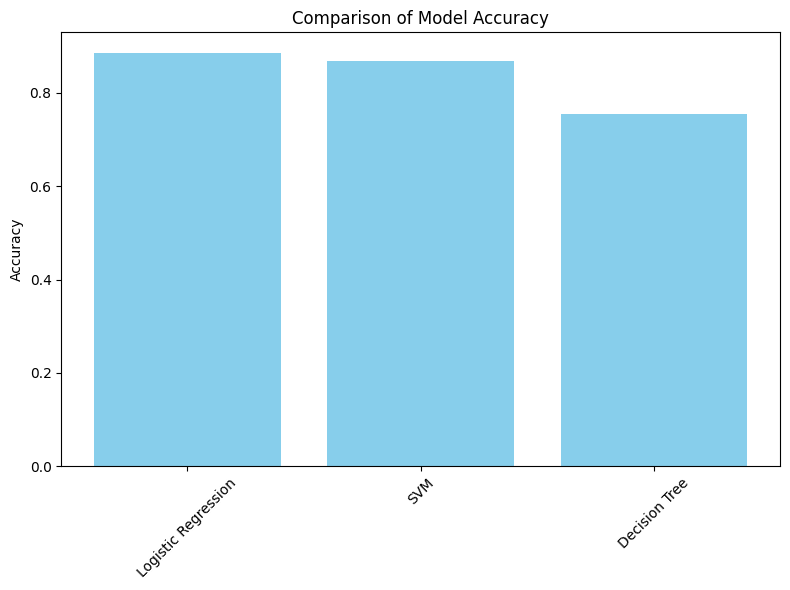

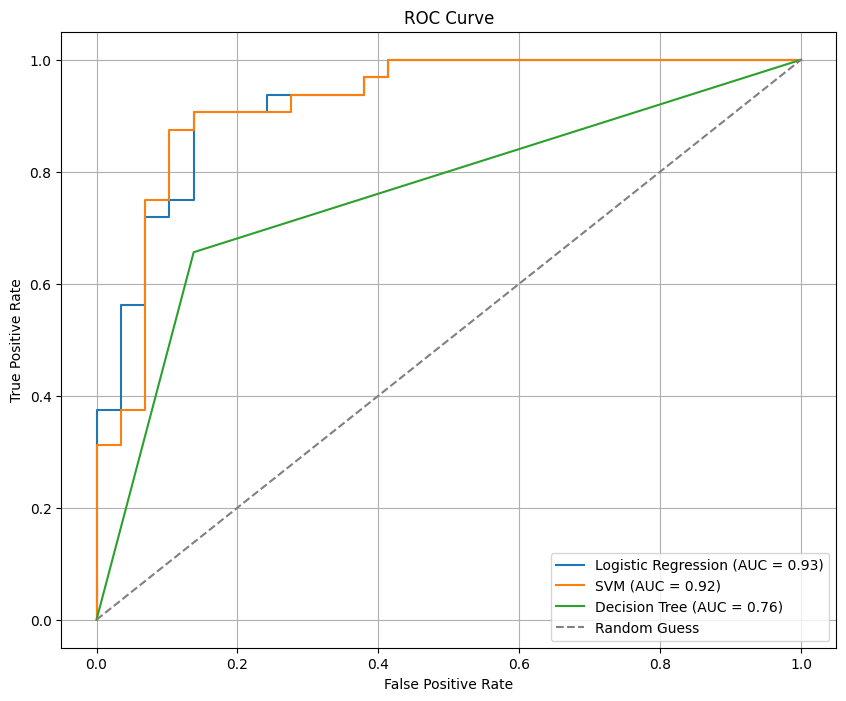

In [ ]:
#comparision

data = pd.read_csv(r"/content/heart (1).csv")

X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='linear', random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy}')

plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [41]:

# Define features (X) and target variable (y)
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
svm_model = SVC(kernel='linear', random_state=42, probability=True)
dt_model = DecisionTreeClassifier(random_state=42)

# Define model combinations
model_combinations = [
    {'name': 'Logistic Regression + SVM', 'models': [lr_model, svm_model]},
    {'name': 'Logistic Regression + Decision Tree', 'models': [lr_model, dt_model]},
    {'name': 'SVM + Decision Tree', 'models': [svm_model, dt_model]}
]

# Train and evaluate each combined model
for combination in model_combinations:
    print(f"Model Combination: {combination['name']}")
    voting_classifier = VotingClassifier(estimators=[(type(model).__name__, model) for model in combination['models']], voting='soft')
    voting_classifier.fit(X_train, y_train)
    y_pred = voting_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print()


Model Combination: Logistic Regression + SVM
Accuracy: 0.8852

Model Combination: Logistic Regression + Decision Tree
Accuracy: 0.7541

Model Combination: SVM + Decision Tree
Accuracy: 0.7541



In [49]:
# Train and evaluate each combined model
for combination in model_combinations:
    print(f"Model Combination: {combination['name']}")
    voting_classifier = VotingClassifier(estimators=[(type(model).__name__, model) for model in combination['models']], voting='soft')
    voting_classifier.fit(X_train, y_train)
    y_pred = voting_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('Confusion Matrix:')
    print(cm)
    print()


Model Combination: Logistic Regression + SVM
Accuracy: 0.8852
MSE: 0.1148
RMSE: 0.3388
Confusion Matrix:
[[25  4]
 [ 3 29]]

Model Combination: Logistic Regression + Decision Tree
Accuracy: 0.7541
MSE: 0.2459
RMSE: 0.4959
Confusion Matrix:
[[25  4]
 [11 21]]

Model Combination: SVM + Decision Tree
Accuracy: 0.7541
MSE: 0.2459
RMSE: 0.4959
Confusion Matrix:
[[25  4]
 [11 21]]



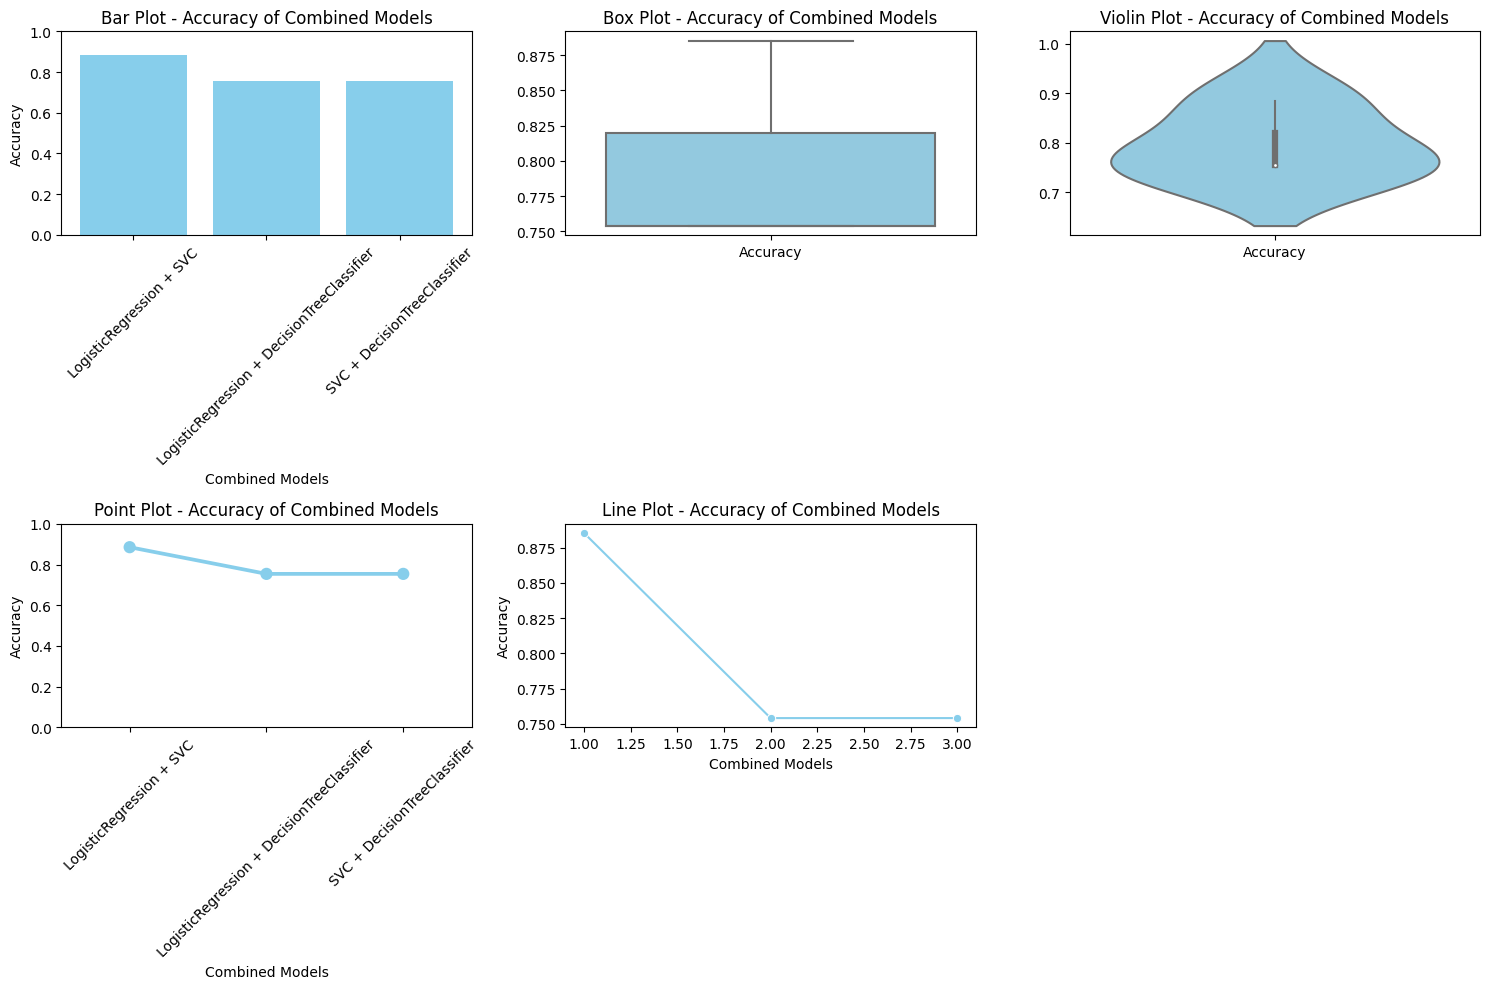

In [47]:





# Dictionary to store accuracies
accuracies = {}

# Train and evaluate each combined model
for combination in model_combinations:
    model_names = [type(model).__name__ for model in combination['models']]
    combined_name = ' + '.join(model_names)
    voting_classifier = VotingClassifier(estimators=[(type(model).__name__, model) for model in combination['models']], voting='soft')
    voting_classifier.fit(X_train, y_train)
    y_pred = voting_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[combined_name] = accuracy

# Plotting
plt.figure(figsize=(15, 10))

# Bar Plot
plt.subplot(2, 3, 1)
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Combined Models')
plt.ylabel('Accuracy')
plt.title('Bar Plot - Accuracy of Combined Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Box Plot
plt.subplot(2, 3, 2)
sns.boxplot(data=pd.DataFrame(list(accuracies.values()), columns=['Accuracy']), color='skyblue')
plt.title('Box Plot - Accuracy of Combined Models')

# Violin Plot
plt.subplot(2, 3, 3)
sns.violinplot(data=pd.DataFrame(list(accuracies.values()), columns=['Accuracy']), color='skyblue')
plt.title('Violin Plot - Accuracy of Combined Models')

# Point Plot
plt.subplot(2, 3, 4)
sns.pointplot(x=list(accuracies.keys()), y=list(accuracies.values()), color='skyblue')
plt.xlabel('Combined Models')
plt.ylabel('Accuracy')
plt.title('Point Plot - Accuracy of Combined Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Line Plot
plt.subplot(2, 3, 5)
sns.lineplot(x=list(range(1, len(accuracies)+1)), y=list(accuracies.values()), marker='o', color='skyblue')
plt.xlabel('Combined Models')
plt.ylabel('Accuracy')
plt.title('Line Plot - Accuracy of Combined Models')

plt.tight_layout()
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv(r"/content/heart (1).csv")

# Define features (X) and target variable (y)
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
svm_model = SVC(kernel='linear', random_state=42, probability=True)
dt_model = DecisionTreeClassifier(random_state=42)

# Create a Voting Classifier combining all three models
voting_classifier = VotingClassifier(estimators=[
    ('Logistic Regression', lr_model),
    ('SVM', svm_model),
    ('Decision Tree', dt_model)
], voting='soft')

# Train the combined model
voting_classifier.fit(X_train, y_train)

# Evaluate the combined model
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Combined Model (LR + SVM + DT): {accuracy:.4f}')


Accuracy of Combined Model (LR + SVM + DT): 0.8197
